In [279]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline
f = open('../output/count_day.out','r')
xx = []
yy = []
for line in f.readlines():
    day = line.split('\t')[0]
    xx.append(day)
    yy.append(int(line.split('\t')[1]))
date = [datetime.strptime(x,'%Y-%m-%d') for x in xx]

yy1 = yy[-2651:]
xx1 = [i for i in xx if i.split('-')[0] != '2009']

In [280]:
weather1 = pd.read_csv('/Users/wanghezhi/Desktop/weather2010-2011.csv')
weather2 = pd.read_csv('/Users/wanghezhi/Desktop/weather2012-2013.csv')
weather3 = pd.read_csv('/Users/wanghezhi/Desktop/weather2014-2015.csv')
weather4 = pd.read_csv('/Users/wanghezhi/Desktop/weather2016-2017.csv')

frames = [weather1, weather2, weather3, weather4]
weather = pd.concat(frames)

weather = weather[['YEARMODA', 'TEMP']]
weather = weather.groupby(['YEARMODA'])['TEMP'].mean()
weather.index.name = None
weather = np.asarray(weather)
weather = pd.DataFrame({'Temperatue':weather}, index = xx1)

complaints = pd.DataFrame({'Complaints': yy1}, index = xx1)

df = pd.concat([weather, complaints], axis=1)

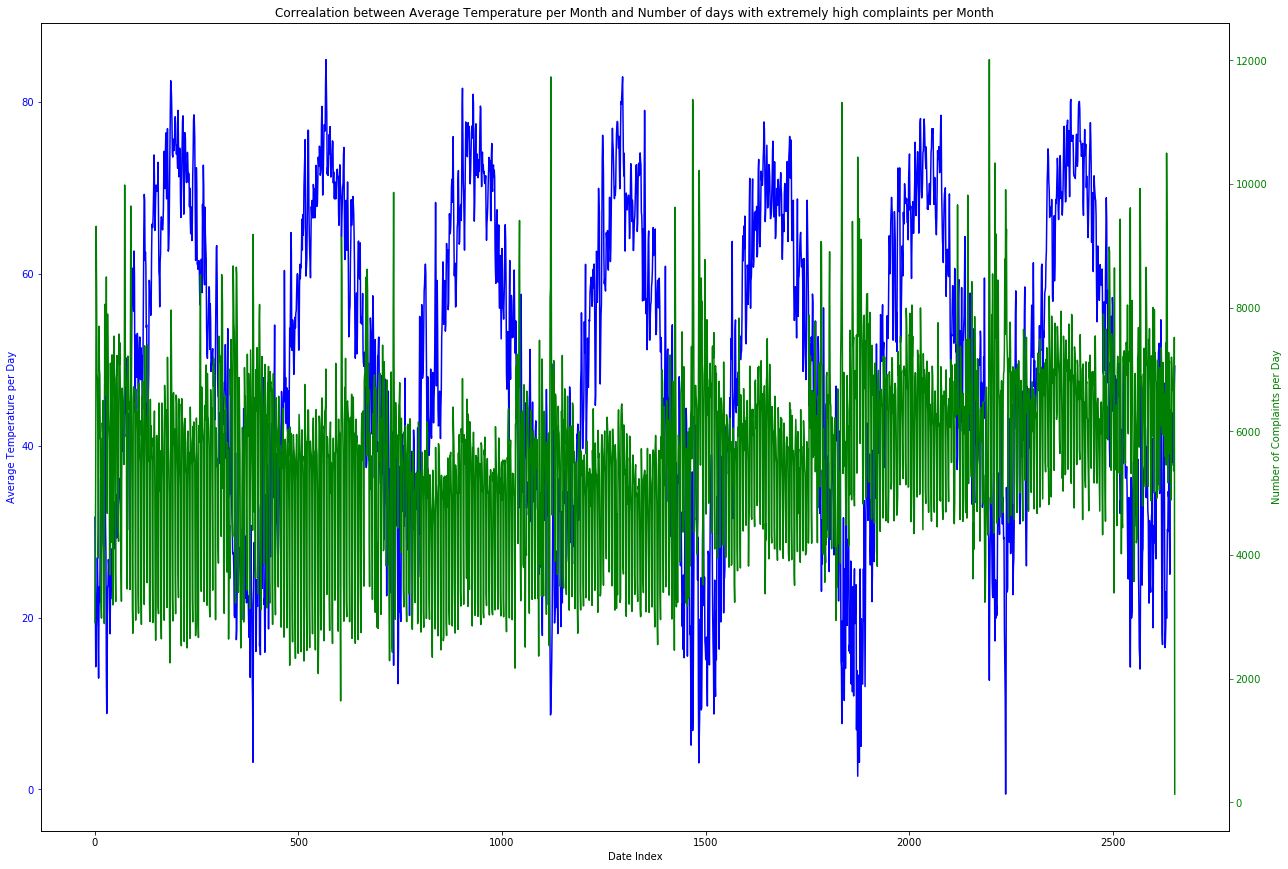

In [281]:
fig, ax1 = plt.subplots(figsize = (18, 12))
t = np.arange(1, 2652)
ax1.plot(t, df['Temperatue'], 'b', label = 'Average Temperature per Month')
ax1.set_xlabel('Date Index')
ax1.set_ylabel('Average Temperature per Day', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(t, df['Complaints'], 'g')
ax2.set_ylabel('Number of Complaints per Day', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()

plt.title('Correalation between Average Temperature per Month and Number of days with extremely high complaints per Month')
plt.savefig('../plots/cor2.png')

In [282]:
from scipy.stats import pearsonr 
print(pearsonr(df['Temperatue'], df['Complaints']))

(-0.19827082281071601, 6.6059514735126489e-25)
